In [314]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

In [316]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [318]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [319]:
print(df.columns.tolist())

['Date', 'Time', 'State', 'Group', 'Unit', 'Sales']


In [320]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [321]:
print(f"Date is na: {df[df['Date'].isna()].size}\n")
print(f"Time is na: {df[df['Time'].isna()].size}\n")
print(f"Sate is na: {df[df['State'].isna()].size}\n")
print(f"Group is na: {df[df['Group'].isna()].size}\n")
print(f"Unit is na: {df[df['Unit'].isna()].size}\n")
print(f"Sales is na: {df[df['Sales'].isna()].size}\n")

Date is na: 0

Time is na: 0

Sate is na: 0

Group is na: 0

Unit is na: 0

Sales is na: 0



In [322]:
print(f"Date is null: {df[df['Date'].isnull()].size}\n")
print(f"Time is null: {df[df['Time'].isnull()].size}\n")
print(f"Sate is null: {df[df['State'].isnull()].size}\n")
print(f"Group is null: {df[df['Group'].isnull()].size}\n")
print(f"Unit is null: {df[df['Unit'].isnull()].size}\n")
print(f"Sales is null: {df[df['Sales'].isnull()].size}\n")

Date is null: 0

Time is null: 0

Sate is null: 0

Group is null: 0

Unit is null: 0

Sales is null: 0



In [323]:
print(f"Date is not na: {df[df['Date'].notna()].size}\n")
print(f"Time is not na: {df[df['Time'].notna()].size}\n")
print(f"Sate is not na: {df[df['State'].notna()].size}\n")
print(f"Group is not na: {df[df['Group'].notna()].size}\n")
print(f"Unit is not na: {df[df['Unit'].notna()].size}\n")
print(f"Sales is not na: {df[df['Sales'].notna()].size}\n")

Date is not na: 45360

Time is not na: 45360

Sate is not na: 45360

Group is not na: 45360

Unit is not na: 45360

Sales is not na: 45360



In [324]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [325]:
df['Date'] = pd.to_datetime(df['Date'])

In [326]:
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [327]:
df['Sales_Thousands'] = df['Sales']/1000
df['Month'] = df['Date'].dt.month
df['Year_Week'] = df['Date'].dt.isocalendar().week
df['Weekday'] = df['Date'].dt.weekday

In [328]:
def annote_bar_chart(chart, dist):
    for bar in chart.patches:
        height = bar.get_height()
        chart.text(
            x=bar.get_x() + bar.get_width() / 2,
            y=height + dist,
            s=f'{height:,.0f}',
            ha='center'
        )

In [329]:
df

,Date,Time,State,Group,Unit,Sales,Sales_Thousands,Month,Year_Week,Weekday
0,2020-10-01,Morning,WA,Kids,8,20000,20.0,10,40,3
1,2020-10-01,Morning,WA,Men,8,20000,20.0,10,40,3
2,2020-10-01,Morning,WA,Women,4,10000,10.0,10,40,3
3,2020-10-01,Morning,WA,Seniors,15,37500,37.5,10,40,3
4,2020-10-01,Afternoon,WA,Kids,3,7500,7.5,10,40,3
...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,35.0,12,53,2
7556,2020-12-30,Evening,TAS,Kids,15,37500,37.5,12,53,2
7557,2020-12-30,Evening,TAS,Men,15,37500,37.5,12,53,2
7558,2020-12-30,Evening,TAS,Women,11,27500,27.5,12,53,2


 # Sales per state: Higher sales in VIC and NSW, lower sales in TAS, NT and WA

In [330]:
df_sales_per_state = df.groupby('State').agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).sort_values(by='Sales_Thousands', ascending=False).reset_index()

In [331]:
df_sales_per_state

,State,Sales_Thousands,Unit
0,VIC,105565.0,42226
1,NSW,74970.0,29988
2,SA,58857.5,23543
3,QLD,33417.5,13367
4,TAS,22760.0,9104
5,NT,22580.0,9032
6,WA,22152.5,8861


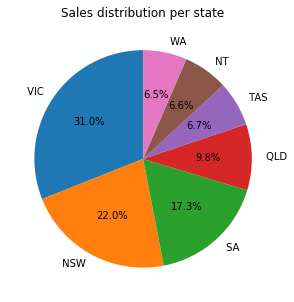

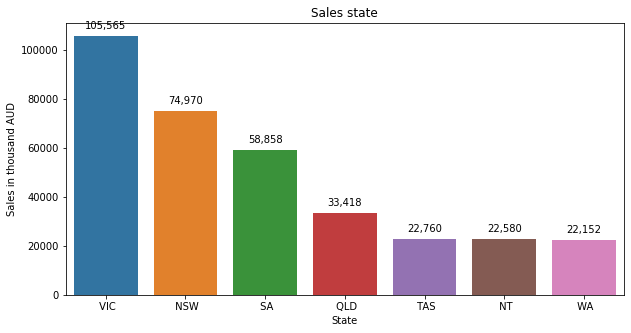

In [332]:
plt.figure(figsize=(10, 5))
plt.pie(df_sales_per_state['Sales_Thousands'], labels=df_sales_per_state['State'], autopct='%1.1f%%', startangle=90)
plt.title('Sales distribution per state')
plt.show()

plt.figure(figsize=(10, 5))
sales_per_state_bar_chart = sns.barplot(x='State', y='Sales_Thousands', data=df_sales_per_state)
annote_bar_chart(sales_per_state_bar_chart, 3000)
plt.ylabel('Sales in thousand AUD')
plt.title('Sales state')
plt.show()

# Sales per Month: Higher sales in December, followed by October then November

In [333]:
df_sales_per_month = df.groupby('Month').agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).reset_index()

In [334]:
df_sales_per_month

,Month,Sales_Thousands,Unit
0,10,114290.0,45716
1,11,90682.5,36273
2,12,135330.0,54132


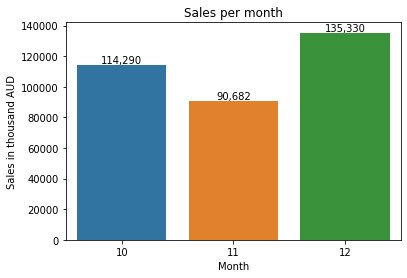

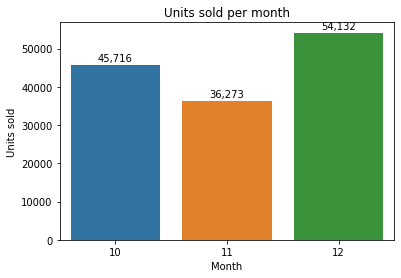

In [335]:
sales_per_month_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month)
annote_bar_chart(sales_per_month_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month')
plt.show()

sales_per_month_bar_chart_units = sns.barplot(x='Month', y='Unit', data=df_sales_per_month)
annote_bar_chart(sales_per_month_bar_chart_units, 1000)
plt.xlabel('Month')
plt.ylabel('Units sold')
plt.title('Units sold per month')
plt.show()

# Sales per week: no inference to draw here

In [336]:
df_sales_per_week = df.groupby(['Year_Week']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).reset_index()

In [337]:
df_sales_per_week

,Year_Week,Sales_Thousands,Unit
0,40,15045.0,6018
1,41,27002.5,10801
2,42,26640.0,10656
3,43,26815.0,10726
4,44,21807.5,8723
5,45,20865.0,8346
6,46,21172.5,8469
7,47,21112.5,8445
8,48,21477.5,8591
9,49,29622.5,11849


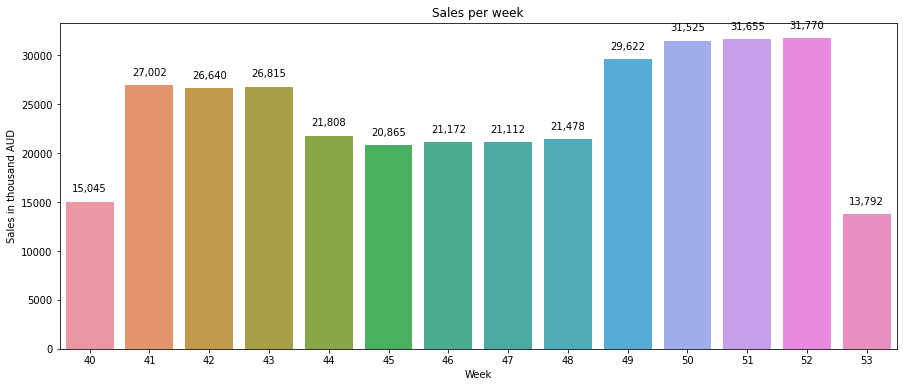

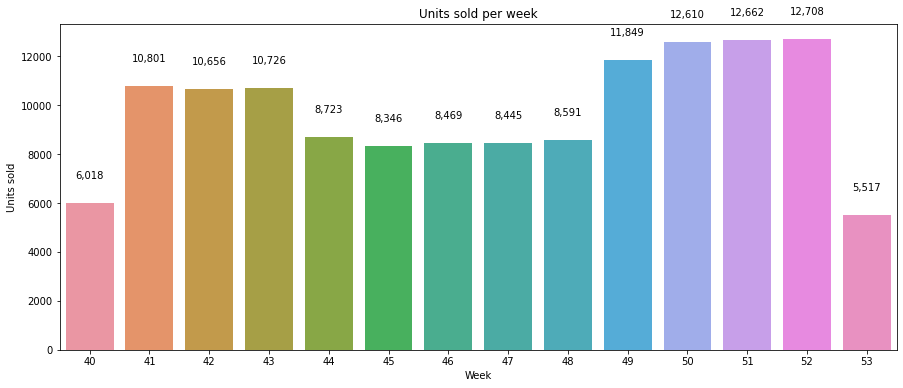

In [338]:
plt.figure(figsize=(15, 6))
sales_per_week_bar_chart = sns.barplot(x='Year_Week', y='Sales_Thousands', data=df_sales_per_week)
annote_bar_chart(sales_per_week_bar_chart, 1000)
plt.xlabel('Week')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per week')
plt.show()

plt.figure(figsize=(15, 6))
sales_per_week_bar_chart_units = sns.barplot(x='Year_Week', y='Unit', data=df_sales_per_week)
annote_bar_chart(sales_per_week_bar_chart_units, 1000)
plt.xlabel('Week')
plt.ylabel('Units sold')
plt.title('Units sold per week')
plt.show()

# Average price analysis: The average price per day is always 2500. That is unlikely if different items have different prices. The data might be incorrect or corrupted.

In [339]:
df_sales_per_day = df.groupby(['Month', 'Date']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).reset_index()

In [340]:
df_sales_per_day['Avg_Price'] = df_sales_per_day['Sales_Thousands'] / df_sales_per_day['Unit'] * 1000

In [341]:
df_sales_per_day

,Month,Date,Sales_Thousands,Unit,Avg_Price
0,10,2020-10-01,3720.0,1488,2500.0
1,10,2020-10-02,3715.0,1486,2500.0
2,10,2020-10-03,3890.0,1556,2500.0
3,10,2020-10-04,3720.0,1488,2500.0
4,10,2020-10-05,3862.5,1545,2500.0
...,...,...,...,...,...
85,12,2020-12-26,4715.0,1886,2500.0
86,12,2020-12-27,4637.5,1855,2500.0
87,12,2020-12-28,4595.0,1838,2500.0
88,12,2020-12-29,4607.5,1843,2500.0


In [342]:
(df['Sales'] / df['Unit']).value_counts()

2500.0    7560
dtype: int64

In [343]:
df_sales_per_day.describe()

,Month,Sales_Thousands,Unit,Avg_Price
count,90.000000,90.000000,90.000000,90.0
mean,11.000000,3781.138889,1512.455556,2500.0
std,0.821071,624.887311,249.954925,0.0
min,10.000000,2725.000000,1090.000000,2500.0
25%,10.000000,3086.875000,1234.750000,2500.0
50%,11.000000,3798.750000,1519.500000,2500.0
75%,12.000000,4428.750000,1771.500000,2500.0
max,12.000000,4765.000000,1906.000000,2500.0


# Sales per Month and State

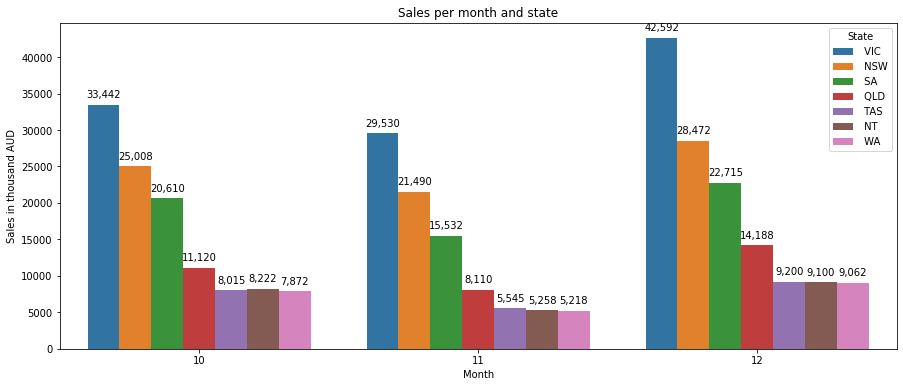

In [344]:
df_sales_per_month_state = df.groupby(['Month','State']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).sort_values(by='Sales_Thousands', ascending=False).reset_index()
plt.figure(figsize=(15, 6))
sales_per_month_state_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month_state, hue = "State")
annote_bar_chart(sales_per_month_state_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month and state')
plt.show()

# Sales are not correlated to Groups

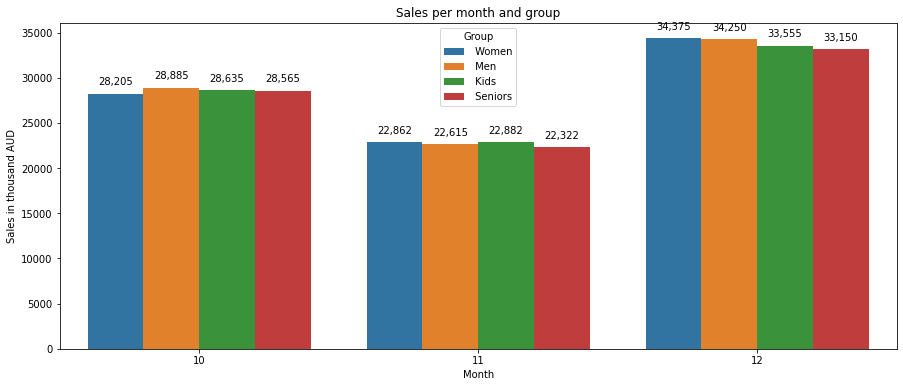

In [345]:
df_sales_per_month_group = df.groupby(['Month','Group']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).sort_values(by='Sales_Thousands', ascending=False).reset_index()
plt.figure(figsize=(15, 6))
sales_per_month_group_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month_group, hue = "Group")
annote_bar_chart(sales_per_month_group_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month and group')
plt.show()

## The time of the day does not impact sales

In [346]:
df.head()

,Date,Time,State,Group,Unit,Sales,Sales_Thousands,Month,Year_Week,Weekday
0,2020-10-01,Morning,WA,Kids,8,20000,20.0,10,40,3
1,2020-10-01,Morning,WA,Men,8,20000,20.0,10,40,3
2,2020-10-01,Morning,WA,Women,4,10000,10.0,10,40,3
3,2020-10-01,Morning,WA,Seniors,15,37500,37.5,10,40,3
4,2020-10-01,Afternoon,WA,Kids,3,7500,7.5,10,40,3


In [347]:
df_sales_per_month_time = df.groupby(['Month','Time']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).reset_index()

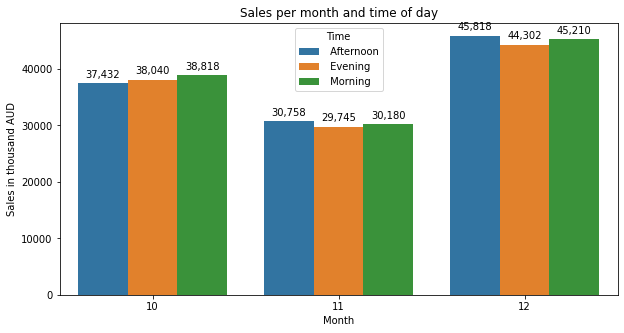

In [348]:
plt.figure(figsize=(10, 5))
sales_per_month_time_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month_time, hue = "Time")
annote_bar_chart(sales_per_month_time_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month and time of day')
plt.show()

## <b>The trend of sales per weekday depended on the month</b>
In total, sales appear to be fairly stable across the days of teh week.
However:
- In October: most sales happened on Thursdays and Fridays
- In November: most sales happened on Mondays and Sundays
- In December: most sales happened on Tuesdays and Wednesdays

In [349]:
df_sales_per_month_weekday = df.groupby(['Month','Weekday']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).reset_index()

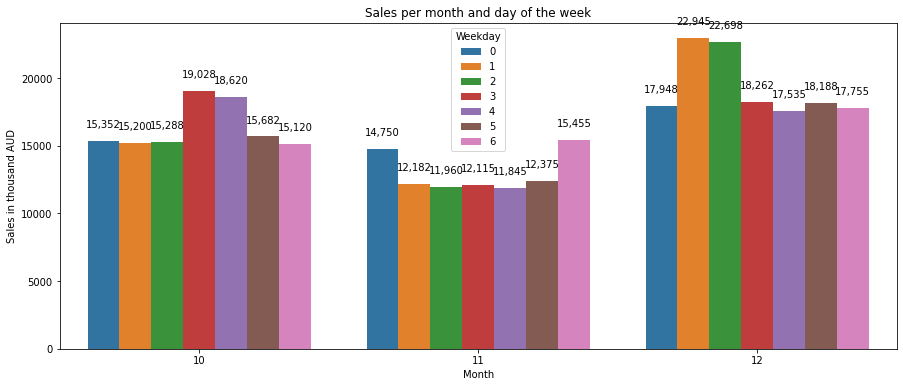

In [350]:
plt.figure(figsize=(15, 6))
sales_per_month_weekday_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month_weekday, hue = "Weekday")
annote_bar_chart(sales_per_month_weekday_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month and day of the week')
plt.show()

## I assumed there were a few specific days (holidays maybe) during the month that could explain different weekday sales trend each month, but there is no datapoint to support that.

# Sales per day trend

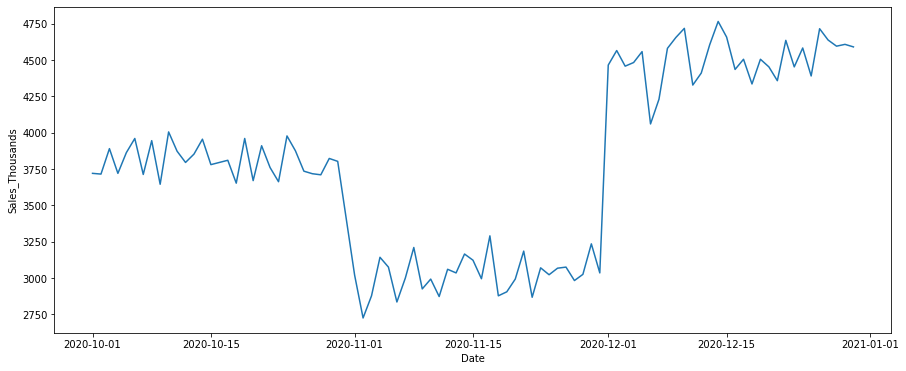

In [351]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Sales_Thousands', data=df_sales_per_day)
plt.show()

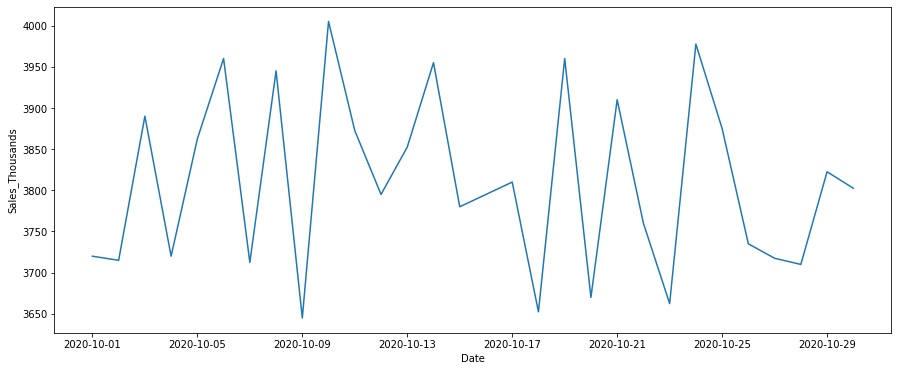

In [352]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Sales_Thousands', data=df_sales_per_day[df_sales_per_day['Month'] == 10])
plt.show()

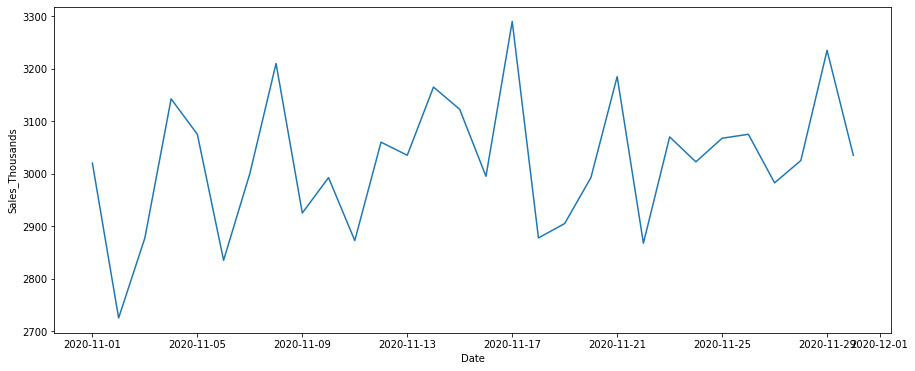

In [353]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Sales_Thousands', data=df_sales_per_day[df_sales_per_day['Month'] == 11])
plt.show()

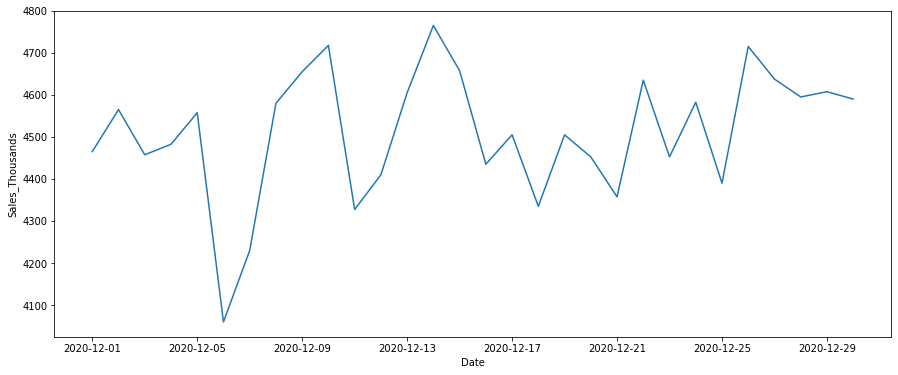

In [354]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Sales_Thousands', data=df_sales_per_day[df_sales_per_day['Month'] == 12])
plt.show()

In [355]:
df[df['Date'] == '2020-12-06']

,Date,Time,State,Group,Unit,Sales,Sales_Thousands,Month,Year_Week,Weekday
5460,2020-12-06,Morning,WA,Kids,13,32500,32.5,12,49,6
5461,2020-12-06,Morning,WA,Men,15,37500,37.5,12,49,6
5462,2020-12-06,Morning,WA,Women,9,22500,22.5,12,49,6
5463,2020-12-06,Morning,WA,Seniors,5,12500,12.5,12,49,6
5464,2020-12-06,Afternoon,WA,Kids,15,37500,37.5,12,49,6
...,...,...,...,...,...,...,...,...,...,...
5539,2020-12-06,Afternoon,TAS,Seniors,9,22500,22.5,12,49,6
5540,2020-12-06,Evening,TAS,Kids,9,22500,22.5,12,49,6
5541,2020-12-06,Evening,TAS,Men,7,17500,17.5,12,49,6
5542,2020-12-06,Evening,TAS,Women,8,20000,20.0,12,49,6


In [356]:
import plotly.express as px
df_sales_per_week_and_day = df.groupby(['Year_Week', 'Weekday']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).reset_index()
df_sales_per_week_and_day

,Year_Week,Weekday,Sales_Thousands,Unit
0,40,3,3720.0,1488
1,40,4,3715.0,1486
2,40,5,3890.0,1556
3,40,6,3720.0,1488
4,41,0,3862.5,1545
...,...,...,...,...
85,52,5,4715.0,1886
86,52,6,4637.5,1855
87,53,0,4595.0,1838
88,53,1,4607.5,1843


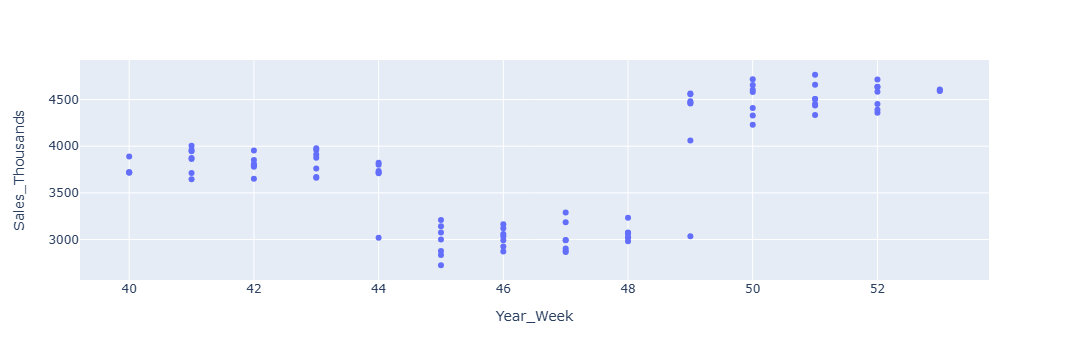

In [357]:
fig = px.scatter(df_sales_per_week_and_day, x="Year_Week", y="Sales_Thousands")
fig.show()

# Applying MinMAx Scaling and One-Hot encoding and checking correlations

In [358]:
df_engineered = df

In [359]:
df_engineered = df_engineered.drop('Sales_Thousands', axis=1, errors='ignore')

In [360]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_engineered[['Sales']] = scaler.fit_transform(df_engineered[['Sales']])
df_engineered

,Date,Time,State,Group,Unit,Sales,Month,Year_Week,Weekday
0,2020-10-01,Morning,WA,Kids,8,0.095238,10,40,3
1,2020-10-01,Morning,WA,Men,8,0.095238,10,40,3
2,2020-10-01,Morning,WA,Women,4,0.031746,10,40,3
3,2020-10-01,Morning,WA,Seniors,15,0.206349,10,40,3
4,2020-10-01,Afternoon,WA,Kids,3,0.015873,10,40,3
...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,0.190476,12,53,2
7556,2020-12-30,Evening,TAS,Kids,15,0.206349,12,53,2
7557,2020-12-30,Evening,TAS,Men,15,0.206349,12,53,2
7558,2020-12-30,Evening,TAS,Women,11,0.142857,12,53,2


In [361]:
df_engineered = pd.get_dummies(df_engineered, columns=['Time', 'State', 'Group'])

In [362]:
df_engineered

,Date,Unit,Sales,Month,Year_Week,Weekday,Time_ Afternoon,Time_ Evening,Time_ Morning,State_ NSW,State_ NT,State_ QLD,State_ SA,State_ TAS,State_ VIC,State_ WA,Group_ Kids,Group_ Men,Group_ Seniors,Group_ Women
0,2020-10-01,8,0.095238,10,40,3,0,0,1,0,0,0,0,0,0,1,1,0,0,0
1,2020-10-01,8,0.095238,10,40,3,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,2020-10-01,4,0.031746,10,40,3,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,2020-10-01,15,0.206349,10,40,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,2020-10-01,3,0.015873,10,40,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,2020-12-30,14,0.190476,12,53,2,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7556,2020-12-30,15,0.206349,12,53,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0
7557,2020-12-30,15,0.206349,12,53,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7558,2020-12-30,11,0.142857,12,53,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1


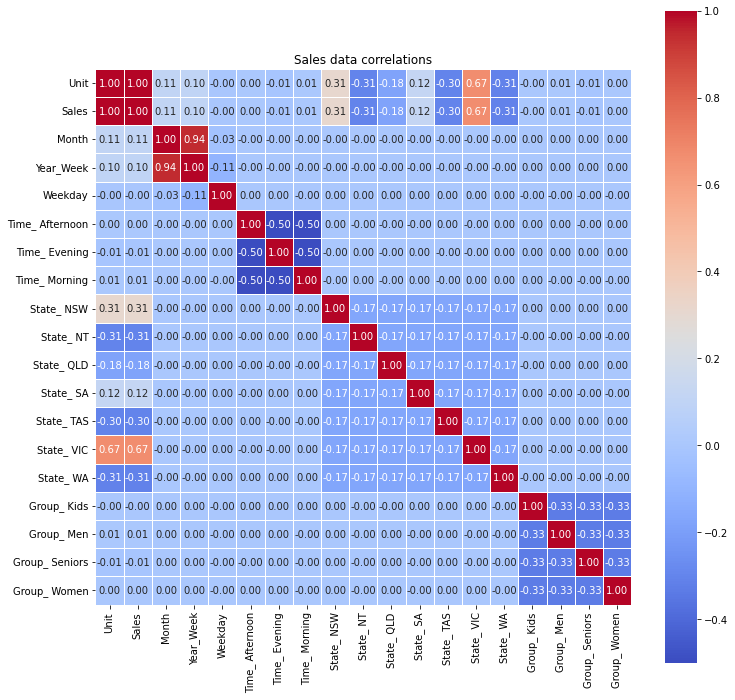

In [363]:
sales_data_eng_correlations = df_engineered.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(sales_data_eng_correlations, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Sales data correlations')
plt.show()

<span style="font-size: 400%; font-weight: bold">Final Report</span>

#### 1. Average price analysis: The average price per day is always 2500. That is unlikely if different items have different prices. The data might be incorrect or corrupted.
#### 2. Sales per day across all states:
#### ------Average: 3.7M  AUD
#### ------Minimum: 2.7M  AUD
#### ------Maximum: 4.8M  AUD
#### 3. Units sold per day across all states:
#### ------Average: 1512 units
#### ------Minimum: 1090 units
#### ------Maximum: 1906 units

#### 4. Sales per state: Higher sales are in VIC and NSW, lower sales in TAS, NT and WA

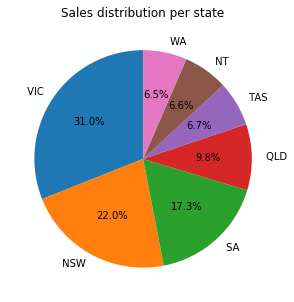

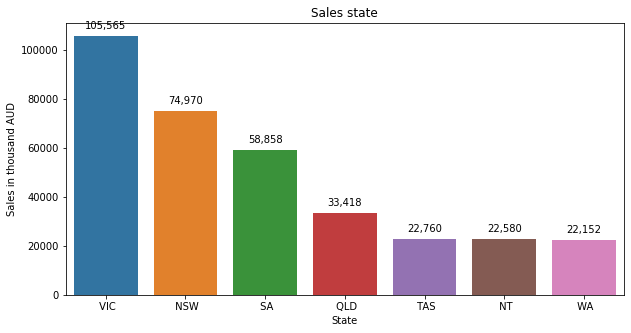

In [364]:
plt.figure(figsize=(10, 5))
plt.pie(df_sales_per_state['Sales_Thousands'], labels=df_sales_per_state['State'], autopct='%1.1f%%', startangle=90)
plt.title('Sales distribution per state')
plt.show()

plt.figure(figsize=(10, 5))
sales_per_state_bar_chart = sns.barplot(x='State', y='Sales_Thousands', data=df_sales_per_state)
annote_bar_chart(sales_per_state_bar_chart, 3000)
plt.ylabel('Sales in thousand AUD')
plt.title('Sales state')
plt.show()

#### 5. Sales per Month: Higher sales in December, followed by October then November

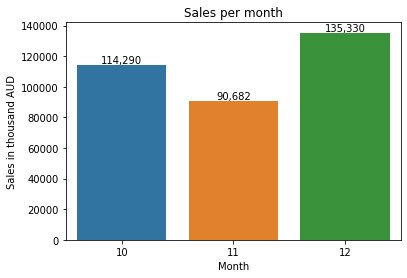

In [365]:
sales_per_month_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month)
annote_bar_chart(sales_per_month_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month')
plt.show()

#### 6. Sales per Month and State: the states rank the same whether we consider sales for the entire quarter or sales per month

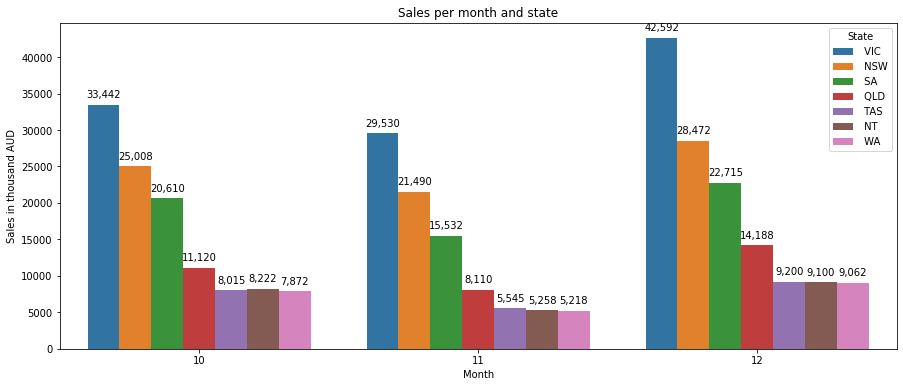

In [366]:
df_sales_per_month_state = df.groupby(['Month','State']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).sort_values(by='Sales_Thousands', ascending=False).reset_index()
plt.figure(figsize=(15, 6))
sales_per_month_state_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month_state, hue = "State")
annote_bar_chart(sales_per_month_state_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month and state')
plt.show()

#### 7. These factors do not influence sales one way or another, so the marketing strategy should be driven by them:
#### -----------Groups: Women, Men, Kids, Seniors - sales are the same for all groups
#### -----------Time of day: Morning, Afternoon, Evening - sales are the same for all times of day

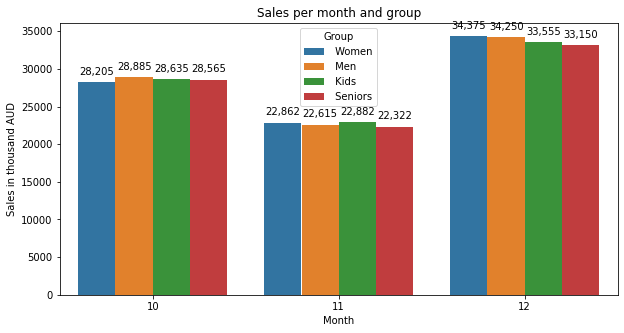

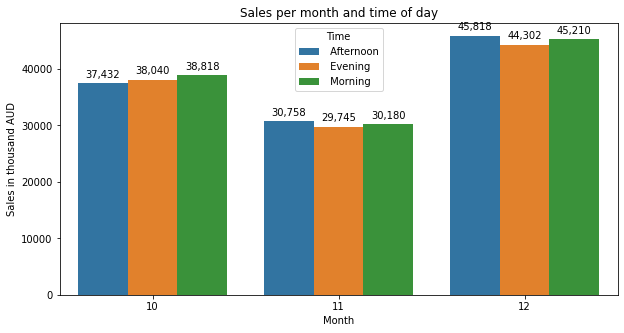

In [367]:
df_sales_per_month_group = df.groupby(['Month','Group']).agg({'Sales_Thousands': 'sum', 'Unit': 'sum'}).sort_values(by='Sales_Thousands', ascending=False).reset_index()
plt.figure(figsize=(10, 5))
sales_per_month_group_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month_group, hue = "Group")
annote_bar_chart(sales_per_month_group_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month and group')
plt.show()

plt.figure(figsize=(10, 5))
sales_per_month_time_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month_time, hue = "Time")
annote_bar_chart(sales_per_month_time_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month and time of day')
plt.show()

#### 8. Overall, sales appear to be stable across the days of the week. However:
#### ---------- In October: most sales happened on Thursdays and Fridays
#### ---------- In November: most sales happened on Mondays and Sundays
#### ---------- In December: most sales happened on Tuesdays and Wednesdays

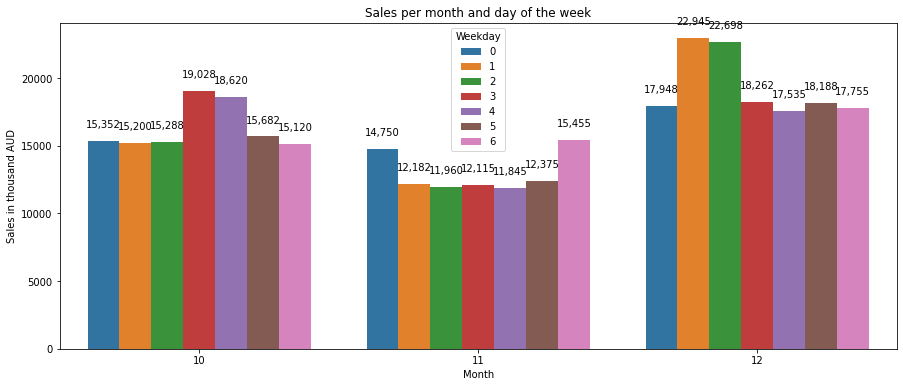

In [368]:
plt.figure(figsize=(15, 6))
sales_per_month_weekday_bar_chart = sns.barplot(x='Month', y='Sales_Thousands', data=df_sales_per_month_weekday, hue = "Weekday")
annote_bar_chart(sales_per_month_weekday_bar_chart, 1000)
plt.xlabel('Month')
plt.ylabel('Sales in thousand AUD')
plt.title('Sales per month and day of the week')
plt.show()

#### 9. We could have assumed there were specific days (e.g., holidays) during certain months that could explain different trends each month, but there is no datapoint to support that. In Australia, apart from Black Friday, Cyber Monday, Boxing Day, Christmas Eve, and Christmas Day, there are no other days that would justify a peak or a valley in clothing sales.

#### On any given month, there is no specific outlier day that stands <b>significanfly</b> out compared to other days

#### So, sales cannot be predicted based solely on specific days of the week.

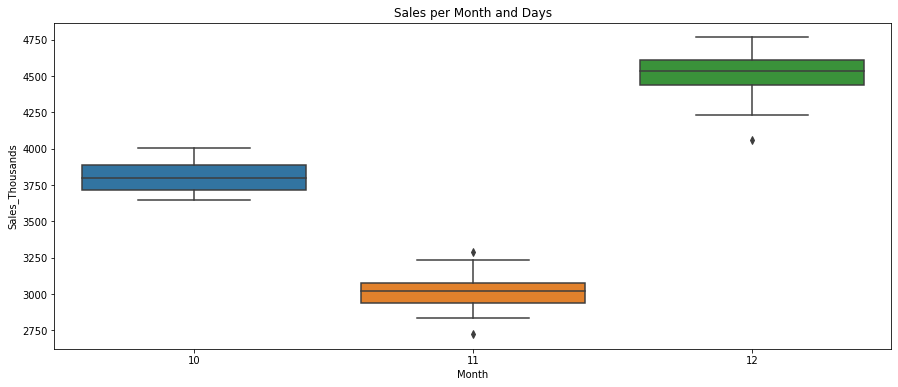

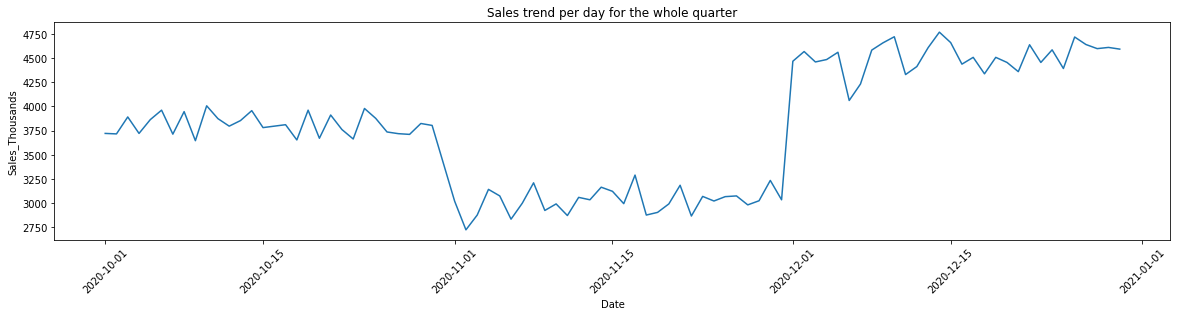

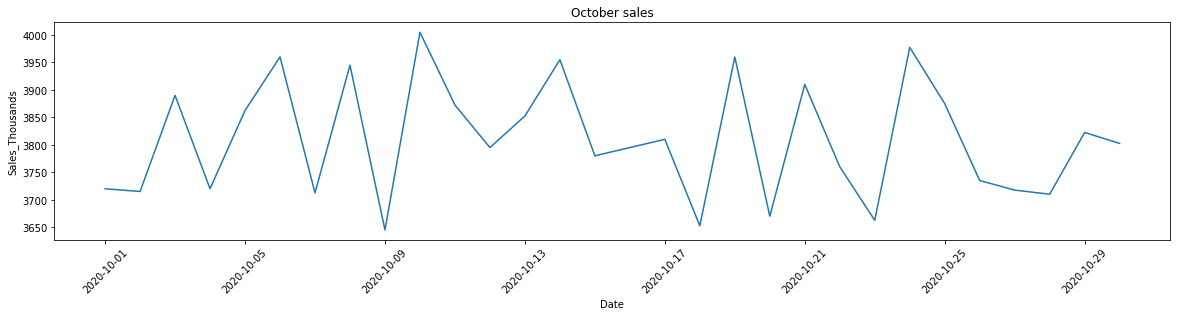

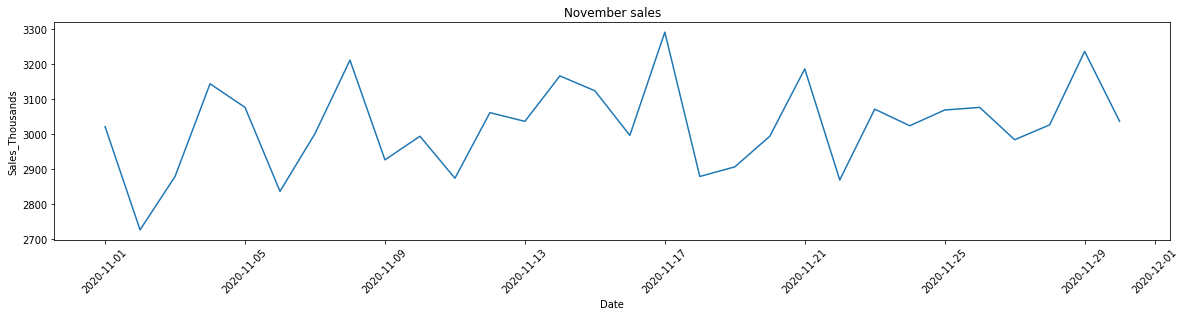

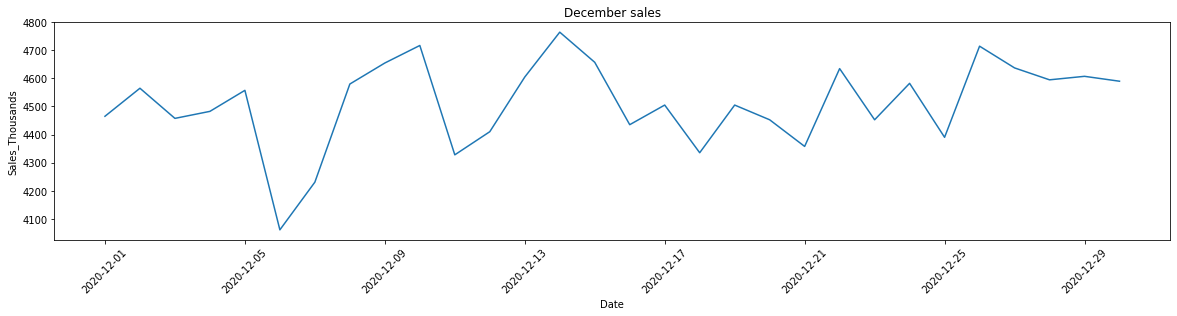

In [369]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Month', y='Sales_Thousands', data=df_sales_per_day)
plt.title('Sales per Month and Days')
plt.show()

plt.figure(figsize=(20, 4))
sns.lineplot(x='Date', y='Sales_Thousands', data=df_sales_per_day)
plt.xticks(rotation=45)
plt.title('Sales trend per day for the whole quarter')
plt.show()

plt.figure(figsize=(20, 4))
sns.lineplot(x='Date', y='Sales_Thousands', data=df_sales_per_day[df_sales_per_day['Month'] == 10])
plt.xticks(rotation=45)
plt.title('October sales')
plt.show()

plt.figure(figsize=(20, 4))
sns.lineplot(x='Date', y='Sales_Thousands', data=df_sales_per_day[df_sales_per_day['Month'] == 11])
plt.xticks(rotation=45)
plt.title('November sales')
plt.show()

plt.figure(figsize=(20, 4))
sns.lineplot(x='Date', y='Sales_Thousands', data=df_sales_per_day[df_sales_per_day['Month'] == 12])
plt.xticks(rotation=45)
plt.title('December sales')
plt.show()

#### 10. As a conclusion, to increase sales, the marketing funds should be directed to WA, NT and TAS states, with no specific regard to the groups of people, days of the week or time of the day